In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

In [3]:
train = pd.read_csv(r"D:\FSDS AND AI\data sets\train.csv")
test = pd.read_csv(r"D:\FSDS AND AI\data sets\test.csv")

In [4]:
y = train["Calories"]
X = train.drop(["Calories", "id"], axis=1)


In [5]:
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    test[col] = le.transform(test[col])


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = XGBRegressor(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    random_state=42
)

model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [8]:
y_pred = model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print("RMSLE:", rmsle)


RMSLE: 0.06102632396244828


In [9]:
test_pred = model.predict(test.drop("id", axis=1))
submission = pd.DataFrame({"id": test["id"], "Calories": test_pred})
submission.to_csv("submissions.csv", index=False)

In [10]:
import os
print("📂 File saved at:", os.getcwd())

📂 File saved at: d:\SEM 5\ML\IP Regression


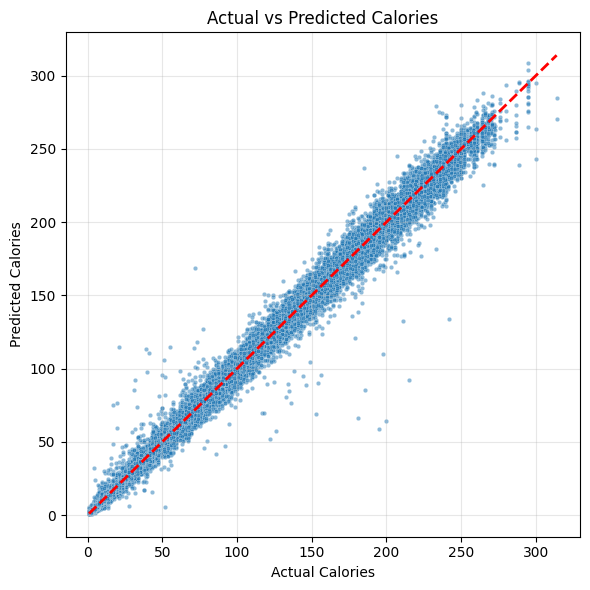

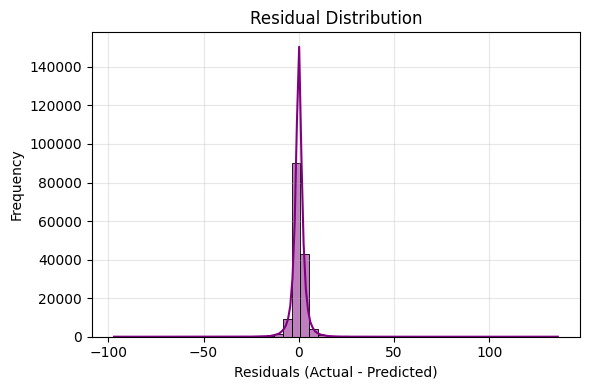

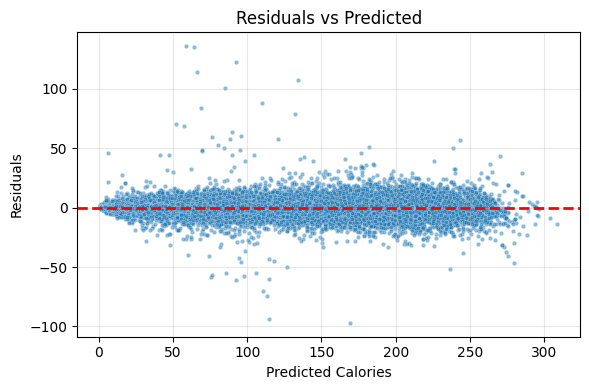

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_val (true values) and y_pred (predicted values) are already defined

# 1️⃣ — Actual vs Predicted Scatter Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_val, y=y_pred, s=10, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # Ideal line
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2️⃣ — Residuals Plot (Error Pattern)
residuals = y_val - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3️⃣ — Residuals vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, s=10, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Calories")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
